# 1 - Import the Libraries

In [1]:
# In order to begin our multiple regression analysis, we first import our necessary libraries as;

import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

%matplotlib inline

# 2 - Load Data into Pandas

In [2]:
#Then, we need to import our excel file with csv format as;

df = pd.read_csv('electricitypricesuk.csv')

In [3]:
#Furthermore, we describe it by;

df.describe()

,ElectPrice,OilPrice,GasPrice
count,129.000000,129.000000,129.000000
mean,45.930233,75.783488,2.060930
std,9.064859,27.812875,0.642254
min,24.010000,18.380000,0.590000
25%,40.910000,52.310000,1.560000
50%,44.960000,67.220000,1.920000
75%,50.270000,107.790000,2.740000
max,90.940000,125.450000,3.270000


# 3 - Check for Multicollinearity

,ElectPrice,OilPrice,GasPrice
ElectPrice,1.000000,0.243228,0.226154
OilPrice,0.243228,1.000000,0.985951
GasPrice,0.226154,0.985951,1.000000


<AxesSubplot:>

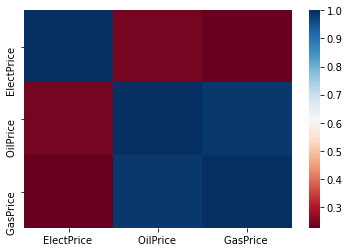

In [4]:
# we can calculate the correlation matrix with
corr = df.corr()

# we can display the correlation matrix with
display(corr)

# we can plot the correlation heatmap with
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='RdBu')

# In the output line we can see the cross-correlation between independent variable electricity prices,
# with our dependent variables oil and gas prices. Our regression value shows relatively low values.
# However we can see a high correlation between our gas and oil prices unsurprisingly.This indicates
# multicollinearity, which is a data problem that could depreciate models explanatory power.

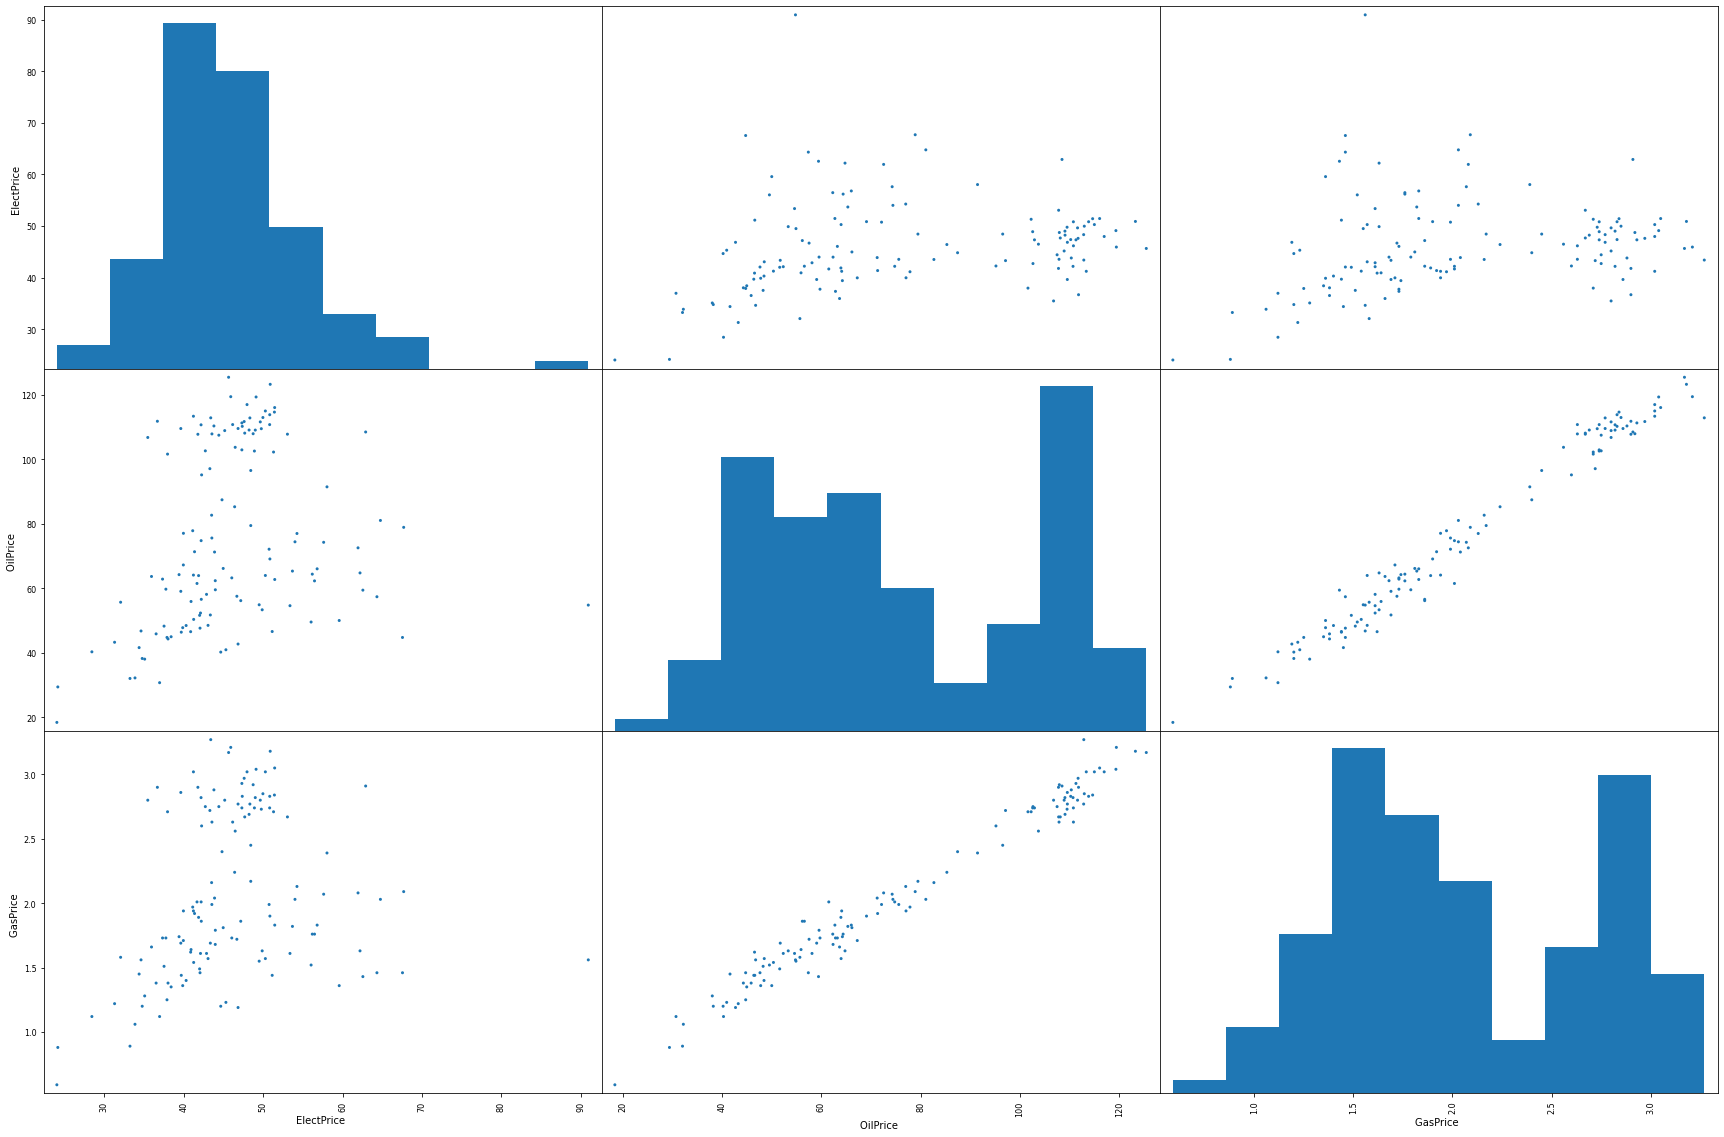

In [5]:
# we can define the plot with
pd.plotting.scatter_matrix(df, alpha = 1, figsize = (30, 20))

# we can show the plot with
plt.show()

# we can see a right skewed normal distribution in the first plot, 
# however normality gets lost in the second and third plotlines. 

# 4 - Describe the Data Set

In [6]:
# lets get the data summary
desc_df = df.describe()

# then lets add the standard deviation metric
desc_df.loc['+3_std'] = desc_df.loc['mean'] + (desc_df.loc['std'] * 3)
desc_df.loc['-3_std'] = desc_df.loc['mean'] - (desc_df.loc['std'] * 3)

# and finally display it
desc_df

#As can be seen, we have some data exceeding 3 standard deviation distance, 
#Those values indicate the outliers due to being too far away from the avarage.

,ElectPrice,OilPrice,GasPrice
count,129.000000,129.000000,129.000000
mean,45.930233,75.783488,2.060930
std,9.064859,27.812875,0.642254
min,24.010000,18.380000,0.590000
25%,40.910000,52.310000,1.560000
50%,44.960000,67.220000,1.920000
75%,50.270000,107.790000,2.740000
max,90.940000,125.450000,3.270000
+3_std,73.124808,159.222112,3.987691
-3_std,18.735657,-7.655135,0.134169


In [7]:
#We can get rid of those outliers by removing the values exceeding 3 standard deviations as such;

remove_df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]



# what rows were removed
df.index.difference(remove_df.index)

Int64Index([127], dtype='int64')

In [9]:
remove_df.describe()

# As can be seen below, our max and min values are now within the 3 standart deviation range.

,ElectPrice,OilPrice,GasPrice
count,128.000000,128.000000,128.000000
mean,45.578594,75.947656,2.064844
std,8.169593,27.859342,0.643231
min,24.010000,18.380000,0.590000
25%,40.897500,52.157500,1.567500
50%,44.885000,68.150000,1.930000
75%,50.037500,107.810000,2.740000
max,67.690000,125.450000,3.270000


In [16]:
# We have seen that our input variables are not suitable of use for this multiple correlation analyses
# First reason is that, they contain high multicolloniarity.
# Second reason is that with only one variable, our regression coefficient with either value,
# Would be around 0.2 to 0.25 which are quite insignificant values,
# Therefore this project will be terminated in here in search of more correlated variables.